<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/Emergency911calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('/content/911.csv.zip')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [8]:
df.shape

(663522, 9)

In [7]:
#What are the top 5 townships (twp) for 911 calls?

df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

148

In [11]:
x = df['title'].iloc[0]
x.split(':')[0]
#creating new feature

'EMS'

In [12]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [13]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

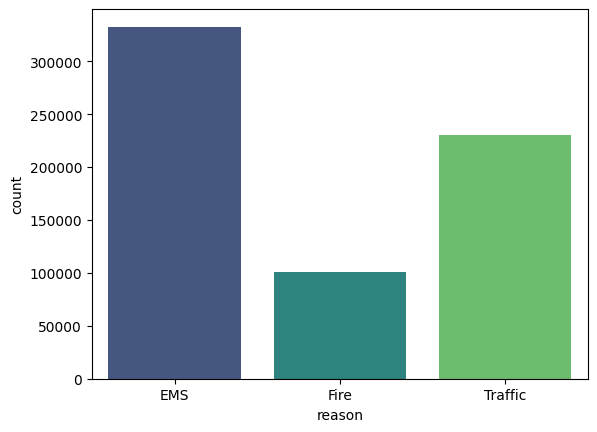

In [14]:
#Now use seaborn to create a countplot of 911 calls by Reason.

sns.countplot(x='reason', data=df, palette='viridis')

In [15]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [16]:
type(df['timeStamp'].iloc[0])

str

In [17]:
# Use pd.to_datetime to convert the column from strings to DateTime objects.

df['timeStamp']=pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[2]
time.hour

14

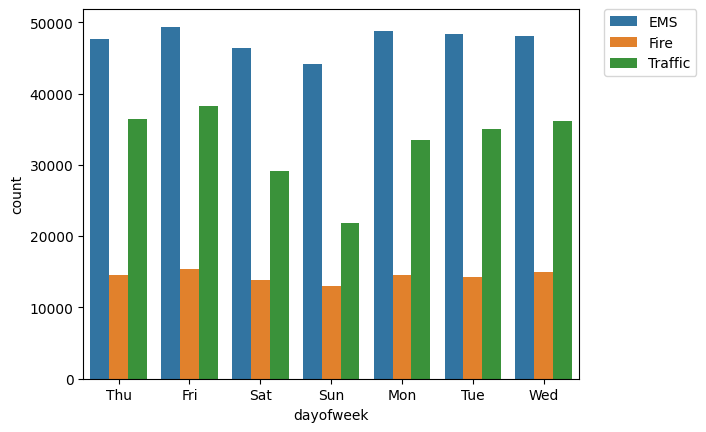

In [18]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

sns.countplot(x='dayofweek',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

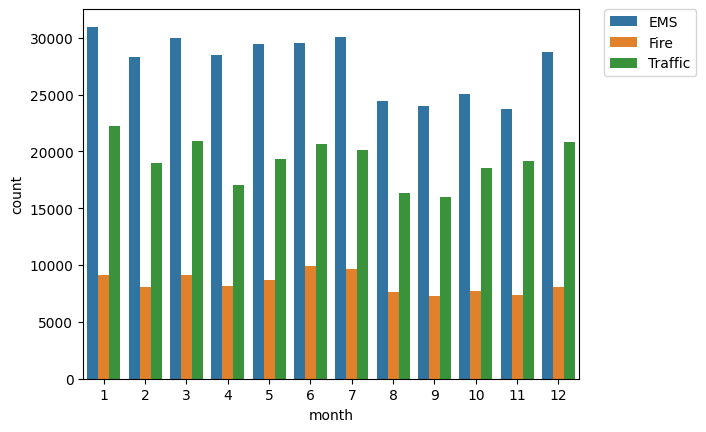

In [19]:
#Now do the same for Month:

sns.countplot(x='month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [21]:
#Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

bymonth= df.groupby('month').count()
bymonth


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


<Axes: xlabel='month', ylabel='lat'>

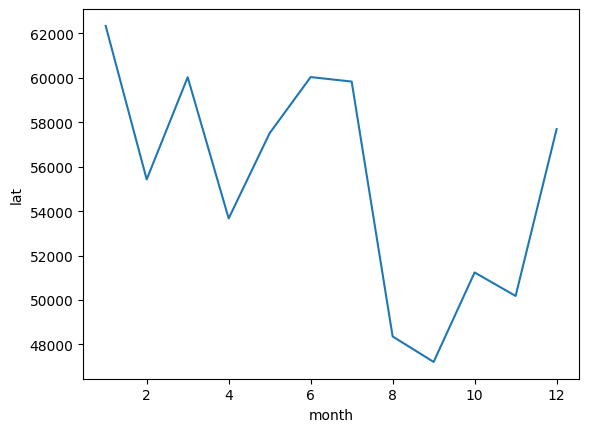

In [22]:
#Now create a simple plot off of the dataframe indicating the count of calls per month.

sns.lineplot(bymonth,x='month',y='lat')

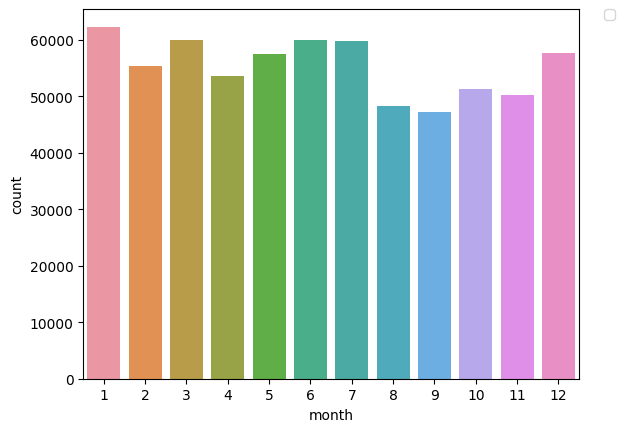

In [23]:
sns.countplot(x='month',data=df)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

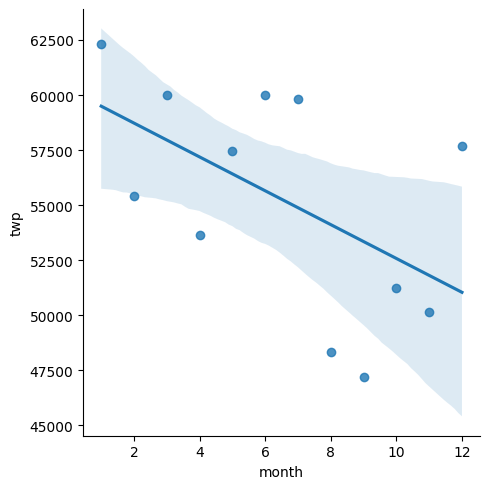

In [24]:
sns.lmplot(x='month', y='twp', data=bymonth.reset_index())

In [25]:
#create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

t = df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:10:52')

In [26]:
df['date'] = df['timeStamp'].apply(lambda t: t.date())

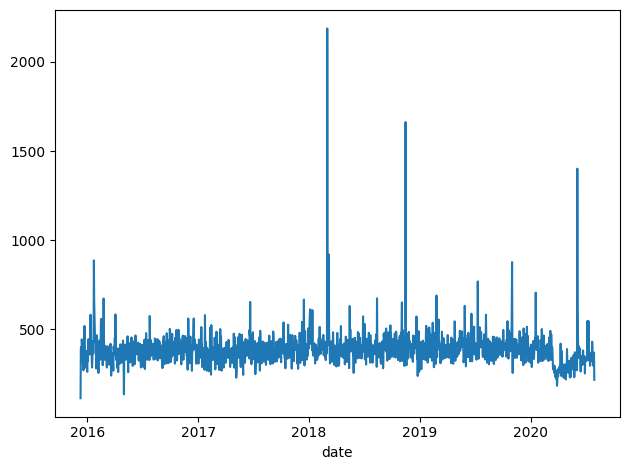

In [27]:
#Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

df.groupby('date').count()['lat'].plot()
plt.tight_layout()

<Axes: xlabel='date'>

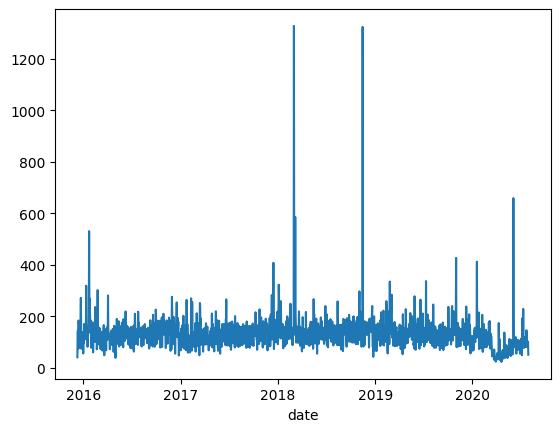

In [28]:
#recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()

<Axes: xlabel='date'>

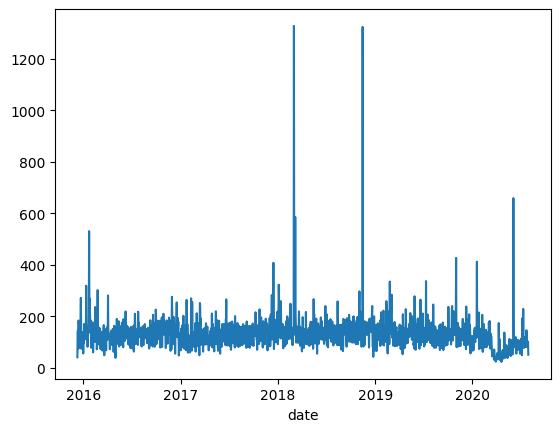

In [29]:
# alt method
df.query("reason == 'Traffic'").groupby('date').count()['lat'].plot()

In [30]:
df.groupby(by=['dayofweek','hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
dayofweek hour                                                               
Fri       0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
          1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
          2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
          3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
          4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...              ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed       19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
          20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
          21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
          22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
          23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                reason  month  date  
dayofweek hour                       
Fri       0       1983   1983  1983  
          1       1635   1635  1635  
          2       1449   1449  1449  
          3       1296   1296  1296  
          4       1339   1339  1339  
...                ...    ...   ...  
Wed       19      4686   4686  4686  
          20      4116   4116  4116  
          21      3537   3537  3537  
          22      2826   2826  2826  
          23      2207   2207  2207  

[168 rows x 12 columns]

In [31]:
dayhour=df.groupby(by=['dayofweek','hour']).count().unstack()
dayhour

lat                                                        ...  \
hour         0     1     2     3     4     5     6     7     8     9   ...   
dayofweek                                                              ...   
Fri        1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  ...   
Mon        1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  ...   
Sat        2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  ...   
Sun        2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  ...   
Thu        1731  1408  1426  1236  1293  1775  2816  4432  5297  5412  ...   
Tue        1720  1459  1322  1213  1247  1741  2784  4425  5634  5566  ...   
Wed        1664  1484  1259  1265  1128  1609  2668  4644  5469  5444  ...   

           date                                                        
hour         14    15    16    17    18    19    20    21    22    23  
dayofweek                                                              
Fri        6394  7040  7065  7113  5668  5056  4375  3913  3422  2834  
Mon        5713  6289  6346  6408  5441  4488  3823  3254  2658  2072  
Sat        5421  5181  5211  5213  4980  4753  4127  3895  3226  2965  
Sun        4744  4475  4560  4505  4402  4135  3748  3161  2629  2323  
Thu        6079  6493  6375  6935  5512  4703  4045  3490  2844  2354  
Tue        5926  6252  6495  6883  5628  4621  3845  3409  2708  2137  
Wed        6069  6533  6745  7062  5691  4686  4116  3537  2826  2207  

[7 rows x 288 columns]

<Axes: xlabel='None-hour', ylabel='dayofweek'>

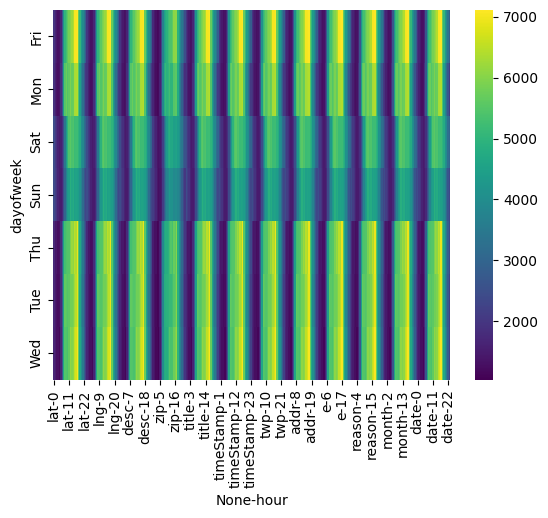

In [32]:
sns.heatmap(dayhour,cmap='viridis')